In [2]:
from collections.abc import Iterable

In [3]:
import pandas as pd
import numpy as np
import json
import pprint

In [17]:
pp = pprint.PrettyPrinter(indent=4)

In [5]:
f = open('5492147125.json')

In [6]:
frames = json.load(f)
frames = frames["frames"]

In [7]:
entities = [x["Entities"] for x in frames]

In [8]:
def clean_dict(x):
    for k,v in x.items():
        if isinstance(v,Iterable):
            x[k] = "".join(map(str,x[k]))

In [9]:
playerEntities = []
HeroEntities = []
MapEntities = []

In [10]:
for framenum,frame in enumerate(entities):
    print(f"######FRAME NUMBER {framenum}##########")
    for ID,entity in frame.items():
        if entity["ENTITY_TYPE"] == "PlayerEntity" :
            dct = {k:[v] for k,v in entity.items()}
            dct["Frame"] = framenum
            clean_dict(dct)
            playerEntities.append(dct)


        elif entity["ENTITY_TYPE"] == "HeroEntity":
            dct = {k:[v] for k,v in entity.items()}
            dct["Frame"] = framenum
            clean_dict(dct)
            HeroEntities.append(dct)

        elif entity["ENTITY_TYPE"]== "Dota2MapEntity":
            dct = {k:[v] for k,v in entity.items()}
            dct["Frame"] = framenum
            clean_dict(dct)
            MapEntities.append(dct)


######FRAME NUMBER 0##########
######FRAME NUMBER 1##########
######FRAME NUMBER 2##########
######FRAME NUMBER 3##########
######FRAME NUMBER 4##########
######FRAME NUMBER 5##########
######FRAME NUMBER 6##########
######FRAME NUMBER 7##########
######FRAME NUMBER 8##########
######FRAME NUMBER 9##########
######FRAME NUMBER 10##########
######FRAME NUMBER 11##########
######FRAME NUMBER 12##########
######FRAME NUMBER 13##########
######FRAME NUMBER 14##########
######FRAME NUMBER 15##########
######FRAME NUMBER 16##########
######FRAME NUMBER 17##########
######FRAME NUMBER 18##########
######FRAME NUMBER 19##########
######FRAME NUMBER 20##########
######FRAME NUMBER 21##########
######FRAME NUMBER 22##########
######FRAME NUMBER 23##########
######FRAME NUMBER 24##########
######FRAME NUMBER 25##########
######FRAME NUMBER 26##########
######FRAME NUMBER 27##########
######FRAME NUMBER 28##########
######FRAME NUMBER 29##########
######FRAME NUMBER 30##########
######FRAME NUMBER

In [11]:
HeroEntities[50]

{'UID': '268435724',
 'ENTITY_TYPE': 'HeroEntity',
 'ID': 'HERO1',
 'HEALTH_REGEN': '5.9997787',
 'MANA_REGEN': '1.0285034',
 'XPOS': '-5558.75',
 'YPOS': '-5577.40625',
 'Frame': 877}

In [24]:
MapEntities[0]["MILLISECONDS_SINCE_GAME_START"]

'1000.0'

In [13]:
player_df = pd.DataFrame(playerEntities)
player_df.reset_index(inplace=True, drop=True)
player_df = player_df.set_index("Frame").bfill()
player_df["PLAYER"] = player_df["UID"]

In [14]:
hero_df = pd.DataFrame(HeroEntities)
hero_df.reset_index(inplace=True, drop=True)
hero_df = hero_df.set_index("Frame").bfill()

In [15]:
hero_df

,UID,ENTITY_TYPE,ID,NAME,PLAYER,BUYBACK_COOLDOWN,HEALTH,HEALTH_PERCENT,ALIVE,VISIBLE_BY_OTHER_TEAM,...,BASE_AGILITY,TOTAL_AGILITY,BASE_INTELLECT,TOTAL_INTELLECT,MOVEMENT_SPEED,DAMAGE_MIN,DAMAGE_MAX,DAMAGE_BONUS,PHYSICAL_ARMOUR,MAGIC_RESISTENCE
Frame,,,,,,,,,,,,,,,,,,,,,
872,268435723,HeroEntity,HERO0,npc_dota_hero_arc_warden,268435466,0.0,740.0,100.0,False,False,...,15.0,20.0,24.0,26.0,285,51,61,2,-2.0,25.0
872,268435724,HeroEntity,HERO1,npc_dota_hero_kunkka,268435467,0.0,800.0,100.0,False,False,...,14.0,17.0,18.0,21.0,300,56,66,2,1.0,25.0
872,268435725,HeroEntity,HERO2,npc_dota_hero_enchantress,268435468,0.0,560.0,100.0,False,False,...,19.0,20.0,22.0,23.0,320,46,56,2,1.0,25.0
872,268435726,HeroEntity,HERO3,npc_dota_hero_rattletrap,268435469,0.0,720.0,100.0,False,False,...,13.0,13.0,18.0,18.0,315,50,52,0,0.0,25.0
872,268435727,HeroEntity,HERO4,npc_dota_hero_zuus,268435470,0.0,620.0,100.0,False,False,...,11.0,11.0,22.0,22.0,300,55,63,0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,268435728,HeroEntity,HERO5,NaN,NaN,NaN,2202.0,56.89922480620155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,268435729,HeroEntity,HERO6,NaN,NaN,NaN,2202.0,56.89922480620155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,268435730,HeroEntity,HERO7,NaN,NaN,NaN,1222.0,44.27536231884058,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


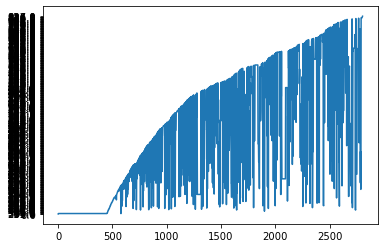

In [88]:
import matplotlib.pyplot as plt
pdf2 = player_df[["ID","XPM"]]
pdf2 = pdf2.dropna()

p0_xp = pdf2[pdf2["ID"]=="PLAYER0"]["XPM"]
nums = [x for x in range(len(p0_xp))]

plt.plot(nums,p0_xp)

In [89]:
p0_xp

Frame
0         0.0
12       91.0
13       91.0
24       91.0
25       91.0
        ...  
3371    834.0
3372    835.0
3373    836.0
3374    837.0
3375    837.0
Name: XPM, Length: 2803, dtype: object

In [61]:
pdf2 = player_df[["ID","XPM"]]
pdf2 = pdf2.dropna()
"""pdf2 = pdf2[pdf2["XP"].str.contains("Team 1") == False]"""
"""pdf2 = pdf2.groupby("ID")["XP"].max()"""
pdf2["XPM"] = pd.to_numeric(pdf2.XPM)
pdf2 = pdf2.groupby("ID")["XPM"].max()
pdf2


ID
PLAYER0    837.0
PLAYER1    837.0
PLAYER2    837.0
PLAYER3    837.0
PLAYER4    837.0
PLAYER5    837.0
PLAYER6    841.0
PLAYER7    837.0
PLAYER8    837.0
PLAYER9    837.0
Name: XPM, dtype: float64

In [36]:
pdf3= player_df[["ID","GOLD_EARNED"]]
pdf3 = pdf3.dropna()
"""pdf2 = pdf2[pdf2["XP"].str.contains("Team 1") == False]"""
"""pdf2 = pdf2.groupby("ID")["XP"].max()"""
pdf3["GOLD_EARNED"] = pd.to_numeric(pdf3.GOLD_EARNED)
pdf3 = pdf3.groupby("ID")["GOLD_EARNED"].max()
pdf3


ID
PLAYER0    24725.0
PLAYER1    17947.0
PLAYER2    16312.0
PLAYER3     9000.0
PLAYER4    13630.0
PLAYER5    14032.0
PLAYER6    20684.0
PLAYER7    15029.0
PLAYER8    10112.0
PLAYER9    32554.0
Name: GOLD_EARNED, dtype: float64

In [37]:
player_df[["ID","XP"]]

,ID,XP
Frame,,
0,PLAYER0,0.0
0,PLAYER1,0.0
0,PLAYER2,0.0
0,PLAYER3,0.0
0,PLAYER4,0.0
...,...,...
3382,PLAYER5,NaN
3382,PLAYER6,NaN
3382,PLAYER7,NaN


In [38]:
hero_df

,UID,ENTITY_TYPE,ID,NAME,PLAYER,BUYBACK_COOLDOWN,HEALTH,HEALTH_PERCENT,ALIVE,VISIBLE_BY_OTHER_TEAM,...,BASE_AGILITY,TOTAL_AGILITY,BASE_INTELLECT,TOTAL_INTELLECT,MOVEMENT_SPEED,DAMAGE_MIN,DAMAGE_MAX,DAMAGE_BONUS,PHYSICAL_ARMOUR,MAGIC_RESISTENCE
Frame,,,,,,,,,,,,,,,,,,,,,
872,268435723,HeroEntity,HERO0,npc_dota_hero_arc_warden,268435466,0.0,740.0,100.0,False,False,...,15.0,20.0,24.0,26.0,285,51,61,2,-2.0,25.0
872,268435724,HeroEntity,HERO1,npc_dota_hero_kunkka,268435467,0.0,800.0,100.0,False,False,...,14.0,17.0,18.0,21.0,300,56,66,2,1.0,25.0
872,268435725,HeroEntity,HERO2,npc_dota_hero_enchantress,268435468,0.0,560.0,100.0,False,False,...,19.0,20.0,22.0,23.0,320,46,56,2,1.0,25.0
872,268435726,HeroEntity,HERO3,npc_dota_hero_rattletrap,268435469,0.0,720.0,100.0,False,False,...,13.0,13.0,18.0,18.0,315,50,52,0,0.0,25.0
872,268435727,HeroEntity,HERO4,npc_dota_hero_zuus,268435470,0.0,620.0,100.0,False,False,...,11.0,11.0,22.0,22.0,300,55,63,0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,268435728,HeroEntity,HERO5,NaN,NaN,NaN,2202.0,56.89922480620155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,268435729,HeroEntity,HERO6,NaN,NaN,NaN,2202.0,56.89922480620155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,268435730,HeroEntity,HERO7,NaN,NaN,NaN,1222.0,44.27536231884058,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
hdf2 = hero_df[["ID","XPOS","YPOS",]]
hdf2


,ID,XPOS,YPOS
Frame,,,
872,HERO0,-6657.1875,-6649.15625
872,HERO1,-6717.5,-6526.75
872,HERO2,-6859.34375,-6412.15625
872,HERO3,-6950.0,-6275.03125
872,HERO4,-7065.78125,-6113.59375
...,...,...,...
3382,HERO5,-6286.71875,-2526.46875
3382,HERO6,-6286.71875,-2526.46875
3382,HERO7,-6412.8125,-2042.96875


In [40]:
result = player_df.merge(hero_df,on=["PLAYER","Frame"])

In [41]:
result["Frame"].max()

KeyError: 'Frame'

In [ ]:
result

In [ ]:
hero_df.index.is_unique

In [ ]:
player_df

In [ ]:
result

In [ ]:
pd.DataFrame(entities).T

In [ ]:
pp.pprint(entities[0])

In [49]:
frames[1232]["Entities"]

{'0000000000': {'UID': 0,
  'ENTITY_TYPE': 'Dota2MapEntity',
  'ID': 'MAP',
  'GAME_TIME': 1240.552,
  'CLOCK_TIME': 270.8452,
  'TIME_IN_PHASE': 270.8452,
  'MILLISECONDS_SINCE_GAME_START': 1255000.0,
  'FRAMEINDEX': 1232,
  'KEYFRAME': False},
 '0268435466': {'UID': 268435466,
  'ENTITY_TYPE': 'PlayerEntity',
  'ID': 'PLAYER0',
  'HERO_DAMAGE': 1090.0,
  'NET_WORTH': 2282.0,
  'GOLD': 452.0,
  'GOLD_EARNED': 1642.0,
  'GOLD_RELIABLE': 213.0,
  'GOLD_FROM_INCOME': 428.0,
  'XPM': 485.0,
  'XP': 1940.0,
  'XCURSOR': 288.0,
  'YCURSOR': 252.0},
 '0268435467': {'UID': 268435467,
  'ENTITY_TYPE': 'PlayerEntity',
  'ID': 'PLAYER1',
  'NET_WORTH': 1939.0,
  'GOLD': 424.0,
  'GOLD_EARNED': 1299.0,
  'GOLD_RELIABLE': 177.0,
  'GOLD_FROM_INCOME': 428.0,
  'XCURSOR': 261.0,
  'YCURSOR': 171.0},
 '0268435468': {'UID': 268435468,
  'ENTITY_TYPE': 'PlayerEntity',
  'ID': 'PLAYER2',
  'NET_WORTH': 1268.0,
  'GOLD': 108.0,
  'GOLD_EARNED': 743.0,
  'GOLD_RELIABLE': 61.0,
  'GOLD_FROM_INCOME': 428.0,